# Room Occupancy
Cilj projekta je predvideti zauzetost prostorije na osnovu faktora okoline. 
<br>
Dataset koji se koristi: https://www.kaggle.com/robmarkcole/occupancy-detection-data-set-uci?select=datatest2.txt


In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow.keras.backend as K
from tensorflow.keras import layers

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [46]:
data = pd.read_csv('datatest2.txt')
data.head(5)

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


<AxesSubplot:>

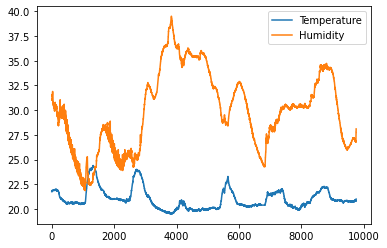

In [48]:
data[['Temperature', 'Humidity']].plot()

In [49]:
def toOrdinalDate(column):
    arr=[]
    for date in column:
        time=pd.Timestamp(date)
        time=time.toordinal()
        arr.append(time)
    return pd.DataFrame(np.array(arr), index=data.index)
data['date'] = toOrdinalDate(data['date'].to_numpy())

In [50]:
def rescaling(dfColumn):
    feature = dfColumn.to_numpy().reshape(-1, 1)
    minmax_scale = StandardScaler()
    scaled_feature = minmax_scale.fit_transform(feature)
    return pd.Series(scaled_feature.reshape(-1), index=data.index)

for column in data:
    if column != 'Occupancy':
        data[column] = rescaling(data[column])


In [51]:
data.head(5)
data['Occupancy'] = data['Occupancy'].astype('float64')

## Razdvajanje klasne kolone od nezavisnih atributa

In [52]:
from sklearn.model_selection import train_test_split
X = data.iloc[:,0:6]
Y = data.iloc[:,-1]
#print(X)
#print(Y)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Funkcija za proveru i prikaz rezultata
Podaci koje je moguce izvuci iz history callback-a su:<br>
['accuracy', 'loss', 'val_accuracy', 'val_loss']

In [53]:
def print_result(model):
    model.evaluate(X_test, Y_test)[1]
    #-----------------------------------------------
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()
    #------------------------------------------------
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='lower right')
    plt.show()

## Hyperparameters
Definisan je batch_size=32 sto predstavlja broj vrsta posle kojih se vrsi podesavanje tezina.
<br>
Broj epoha tj. broj iteracija kroz koje prolaze svi podaci u trening setu je podesen na 30.
<br>
Definisan je ulazni (vidljivi) layer input_dim=6 na osnovu broja nezavisnih atributa (features).
<br>
Broj cvorova u hidden layer-ima podesen je na 16. 

In [54]:
BATCH_SIZE=32
EPOCHS=30
INPUT_DIM=6
NODES1=16
NODES2=16

# Definisanje i treniranje modela

## Loss: binary_crossentropy
Binary cross-entropy je logaritmaska loss funkcija, koristi se kod binarne klasifikacije. Kod skupa podataka sa vise klasa koristi se categorical_crossentropy. Metrika koja se posmatra i koristi u treniranju mreze je preciznost(accurancy) i ona se i najcesce koristi.

Epoch 1/30
244/244 [==============================] - 1s 5ms/step - loss: 0.5149 - accuracy: 0.7740 - val_loss: 0.2512 - val_accuracy: 0.9231
Epoch 2/30
244/244 [==============================] - 1s 4ms/step - loss: 0.2026 - accuracy: 0.9639 - val_loss: 0.1203 - val_accuracy: 0.9826
Epoch 3/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0978 - accuracy: 0.9868 - val_loss: 0.0784 - val_accuracy: 0.9826
Epoch 4/30
244/244 [==============================] - 1s 3ms/step - loss: 0.0624 - accuracy: 0.9887 - val_loss: 0.0630 - val_accuracy: 0.9856
Epoch 5/30
244/244 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9900 - val_loss: 0.0553 - val_accuracy: 0.9887
Epoch 6/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0440 - accuracy: 0.9903 - val_loss: 0.0507 - val_accuracy: 0.9887
Epoch 7/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0374 - accuracy: 0.9920 - val_loss: 0.0479 - val_accuracy: 0.9897
Epoch 

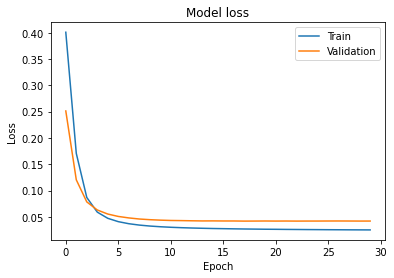

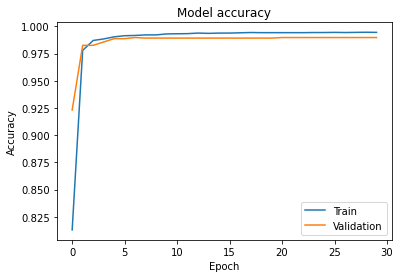

In [55]:
network = Sequential()
network.add(Dense(NODES1, activation="relu", input_dim=INPUT_DIM))
network.add(Dense(NODES2,activation="relu"))
network.add(Dense(1, activation="sigmoid"))

network.compile(optimizer='sgd', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

hist = network.fit(X_train, Y_train, 
                   batch_size=BATCH_SIZE, epochs=EPOCHS, 
                   validation_data=(X_test, Y_test))

#network.summary()

print_result(network)

## Loss: custom_binary_crossentropy
Pokazuje malo bolje rezultate u odnosu na binary cross entropy iz Keras API-a.

Epoch 1/30
244/244 [==============================] - 2s 5ms/step - loss: 0.6433 - accuracy: 0.6098 - val_loss: 0.4101 - val_accuracy: 0.8519
Epoch 2/30
244/244 [==============================] - 1s 5ms/step - loss: 0.3641 - accuracy: 0.8855 - val_loss: 0.2357 - val_accuracy: 0.9764
Epoch 3/30
244/244 [==============================] - ETA: 0s - loss: 0.2019 - accuracy: 0.98 - 1s 4ms/step - loss: 0.2011 - accuracy: 0.9824 - val_loss: 0.1351 - val_accuracy: 0.9856
Epoch 4/30
244/244 [==============================] - 1s 5ms/step - loss: 0.1147 - accuracy: 0.9891 - val_loss: 0.0897 - val_accuracy: 0.9867
Epoch 5/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0746 - accuracy: 0.9892 - val_loss: 0.0694 - val_accuracy: 0.9882
Epoch 6/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0573 - accuracy: 0.9904 - val_loss: 0.0596 - val_accuracy: 0.9882
Epoch 7/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0465 - accuracy: 0.9917 - val_

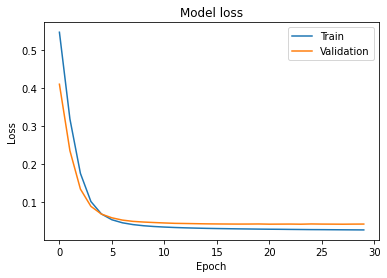

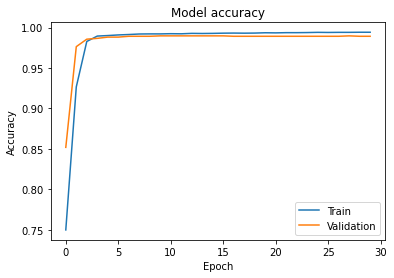

In [56]:
network = Sequential()
network.add(Dense(NODES1, activation="relu", input_dim=INPUT_DIM))
network.add(Dense(NODES2,activation="relu"))
network.add(Dense(1, activation="sigmoid"))

_EPSILON = K.epsilon()
def custom_binary_crossentropy(y_true, y_pred):
    y_true = tf.dtypes.cast(y_true, tf.float32)
    y_pred = K.clip(y_pred, _EPSILON, 1.0-_EPSILON)
    out = -(y_true * K.log(y_pred) + (1.0 - y_true) * K.log(1.0 - y_pred))
    return K.mean(out, axis=-1)

network.compile(optimizer='sgd', 
                loss=custom_binary_crossentropy, 
                metrics=['accuracy'])

hist = network.fit(X_train, Y_train, 
                   batch_size=BATCH_SIZE, epochs=EPOCHS, 
                   validation_data=(X_test, Y_test))

print_result(network)

## Loss: squared_hinge
U situacijama kada je potrebno fino podesavanje modela (tezina). Vece greske su "kaznjene" znacajnije od manjih.

Epoch 1/30
195/195 [==============================] - 2s 7ms/step - loss: 0.3531 - accuracy: 0.8214 - val_loss: 0.0897 - val_accuracy: 0.9801
Epoch 2/30
195/195 [==============================] - 1s 5ms/step - loss: 0.0760 - accuracy: 0.9816 - val_loss: 0.0446 - val_accuracy: 0.9910
Epoch 3/30
195/195 [==============================] - 1s 5ms/step - loss: 0.0400 - accuracy: 0.9924 - val_loss: 0.0327 - val_accuracy: 0.9917
Epoch 4/30
195/195 [==============================] - 1s 4ms/step - loss: 0.0300 - accuracy: 0.9943 - val_loss: 0.0277 - val_accuracy: 0.9930
Epoch 5/30
195/195 [==============================] - 1s 4ms/step - loss: 0.0352 - accuracy: 0.9911 - val_loss: 0.0248 - val_accuracy: 0.9936
Epoch 6/30
195/195 [==============================] - 1s 4ms/step - loss: 0.0279 - accuracy: 0.9939 - val_loss: 0.0229 - val_accuracy: 0.9936
Epoch 7/30
195/195 [==============================] - 1s 4ms/step - loss: 0.0222 - accuracy: 0.9946 - val_loss: 0.0216 - val_accuracy: 0.9942
Epoch 

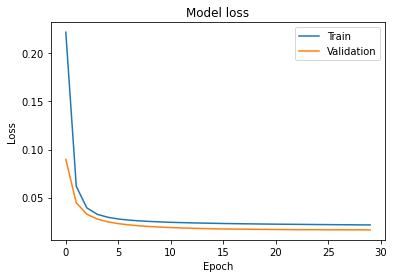

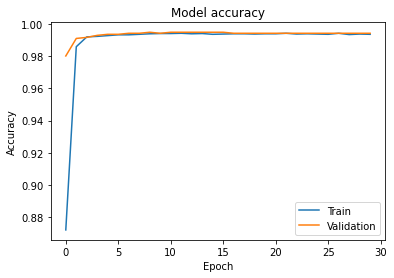

In [57]:
# promena vrednosti klasa {0,1} na {-1,1}
#jer loss funkcije koriste negativne vrednosti
yHinge = Y
yHinge.replace({0: -1})

X_trainH, X_testH, Y_trainH, Y_testH = train_test_split(X, yHinge, test_size=0.2, random_state=1)
X_trainH, X_valH, Y_trainH, Y_valH = train_test_split(X_trainH, Y_trainH, test_size=0.2, random_state=1)

# radi dobro kada je u poslednjem sloju tanh aktivaciona funkcija
classifier2 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='tanh'),])

classifier2.compile(optimizer='sgd',  
                    loss='squared_hinge', 
                    metrics=['accuracy'])

hist = classifier2.fit(X_trainH, Y_trainH, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_valH, Y_valH))

print_result(classifier2)

## Loss: custom_mse 1
Modifikovana MSE loss funcija: I ako MSE odgovara regresiji, a ne klasifikaciji, jedina razlika jeste ta da se razlika izmedju stvarne vrednosti i predvidjene deli sa 10. Na taj nacin se smanjuje magnituda gubitaka sto moze biti korisno u situacijama kada je MSE velika.

Epoch 1/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0773 - accuracy: 0.5153 - val_loss: 0.0680 - val_accuracy: 0.7924
Epoch 2/30
244/244 [==============================] - 1s 3ms/step - loss: 0.0646 - accuracy: 0.7874 - val_loss: 0.0583 - val_accuracy: 0.7899
Epoch 3/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0549 - accuracy: 0.7965 - val_loss: 0.0515 - val_accuracy: 0.7960
Epoch 4/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0492 - accuracy: 0.7970 - val_loss: 0.0462 - val_accuracy: 0.8063
Epoch 5/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0440 - accuracy: 0.8084 - val_loss: 0.0416 - val_accuracy: 0.8288
Epoch 6/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0397 - accuracy: 0.8323 - val_loss: 0.0373 - val_accuracy: 0.8575
Epoch 7/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0343 - accuracy: 0.8841 - val_loss: 0.0332 - val_accuracy: 0.8826
Epoch 

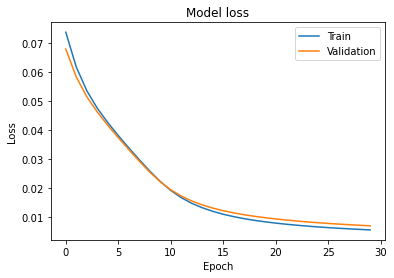

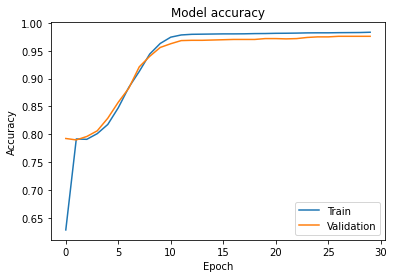

In [58]:
classifier4 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='sigmoid'),])

def custom_mse1(y_actual, y_pred):
    y_actual = tf.dtypes.cast(y_actual, tf.float32)
    loss = K.mean(K.sum(K.square((y_actual-y_pred)/10.)))
    return loss

classifier4.compile(optimizer='sgd',  
                    loss=custom_mse1, 
                    metrics=['accuracy'])

hist = classifier4.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier4)

## Loss: custom_mse 2
U ovoj varijanti MSE loss funkcije, drugoj vrednosti cemo dodeliti veci "penal"

Epoch 1/30
244/244 [==============================] - 1s 4ms/step - loss: 0.2778 - accuracy: 0.4458 - val_loss: 0.1990 - val_accuracy: 0.8375
Epoch 2/30
244/244 [==============================] - 1s 4ms/step - loss: 0.1801 - accuracy: 0.8542 - val_loss: 0.1456 - val_accuracy: 0.8944
Epoch 3/30
244/244 [==============================] - 1s 5ms/step - loss: 0.1319 - accuracy: 0.9126 - val_loss: 0.1102 - val_accuracy: 0.9149
Epoch 4/30
244/244 [==============================] - 1s 6ms/step - loss: 0.1004 - accuracy: 0.9273 - val_loss: 0.0855 - val_accuracy: 0.9252
Epoch 5/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0753 - accuracy: 0.9436 - val_loss: 0.0676 - val_accuracy: 0.9539
Epoch 6/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0608 - accuracy: 0.9680 - val_loss: 0.0544 - val_accuracy: 0.9672
Epoch 7/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0461 - accuracy: 0.9768 - val_loss: 0.0446 - val_accuracy: 0.9703
Epoch 

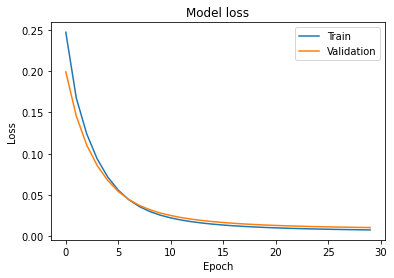

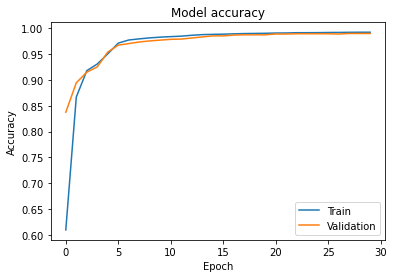

In [59]:
classifier6 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='sigmoid'),])

def custom_mse2(y_actual, y_pred):
    y_actual = tf.dtypes.cast(y_actual, tf.float32)
    loss=K.square(y_pred - y_actual)
    loss=loss*[0.2,0.8]
    return K.sum(loss,axis=1)
    

classifier6.compile(optimizer='sgd',  
                    loss=custom_mse2, 
                    metrics=['accuracy'])

hist = classifier6.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier6)

##  Loss: Sign penalty
Najpre se proverava da li znak predikcije i stvarne vrednosti razlicit. Ako jeste, to je promasaj znaka i taj slucaj se "kaznjava" tako sto se mnozi sa 10. A ako su predikcija i stvarna vrednost istog znaka, onda nema kaznjavanja. 
<br> 
Vraca srednju vrednost gresaka.

Epoch 1/30
244/244 [==============================] - 3s 8ms/step - loss: 0.2185 - accuracy: 0.7770 - val_loss: 0.1396 - val_accuracy: 0.8426
Epoch 2/30
244/244 [==============================] - 1s 5ms/step - loss: 0.1161 - accuracy: 0.8779 - val_loss: 0.0805 - val_accuracy: 0.9416
Epoch 3/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0674 - accuracy: 0.9614 - val_loss: 0.0551 - val_accuracy: 0.9539
Epoch 4/30
244/244 [==============================] - 1s 6ms/step - loss: 0.0445 - accuracy: 0.9717 - val_loss: 0.0425 - val_accuracy: 0.9610
Epoch 5/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0351 - accuracy: 0.9733 - val_loss: 0.0347 - val_accuracy: 0.9651
Epoch 6/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0282 - accuracy: 0.9760 - val_loss: 0.0294 - val_accuracy: 0.9677
Epoch 7/30
244/244 [==============================] - 2s 7ms/step - loss: 0.0226 - accuracy: 0.9798 - val_loss: 0.0256 - val_accuracy: 0.9713
Epoch 

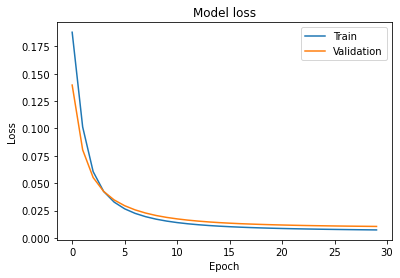

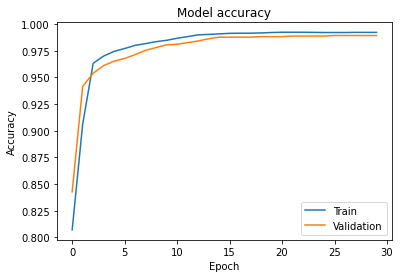

In [60]:
def sign_penalty(y_actual, y_pred):
    y_actual = tf.dtypes.cast(y_actual, tf.float32)
    penalty = 10.
    loss = tf.where(tf.less(y_actual * y_pred, 0), \
                     penalty * tf.square(y_actual - y_pred), \
                     tf.square(y_actual - y_pred))
    return tf.reduce_mean(loss, axis=-1)

classifier5 = Sequential([Dense(NODES1, activation='relu', input_dim=INPUT_DIM),
                          Dense(NODES2, activation='relu'), 
                          Dense(1, activation='sigmoid'),])

classifier5.compile(optimizer='sgd',  
                    loss=sign_penalty, 
                    metrics=['accuracy'])

hist = classifier5.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier5)

## Koriscenje adam(Adaptive Moment estimation) optimizatora
Adam algorotam je brzi i zauzima manje memorije od SGD koji je i dalje najkorisceniji. Kreiran je sa idejom da koristi prednosti RMSProp(Root Mean Square Propagation) i AdaGrad(Adaptive Gradient) algoritama.
<br>Dropout sloj se koristi za sprecavanje overfitting-a tako sto zanemaruje pojedine cvorove tokom treniranja.
<br>
### Optimizer: adam & Loss: binary_crossentropy & without Dropout layer

Epoch 1/30
244/244 [==============================] - 2s 5ms/step - loss: 0.4039 - accuracy: 0.8189 - val_loss: 0.1146 - val_accuracy: 0.9698
Epoch 2/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0721 - accuracy: 0.9825 - val_loss: 0.0476 - val_accuracy: 0.9892
Epoch 3/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0373 - accuracy: 0.9913 - val_loss: 0.0432 - val_accuracy: 0.9903
Epoch 4/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0318 - accuracy: 0.9926 - val_loss: 0.0428 - val_accuracy: 0.9903
Epoch 5/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0288 - accuracy: 0.9941 - val_loss: 0.0423 - val_accuracy: 0.9903
Epoch 6/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0292 - accuracy: 0.9939 - val_loss: 0.0423 - val_accuracy: 0.9903
Epoch 7/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0199 - accuracy: 0.9958 - val_loss: 0.0428 - val_accuracy: 0.9903
Epoch 

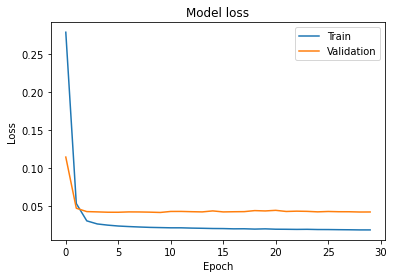

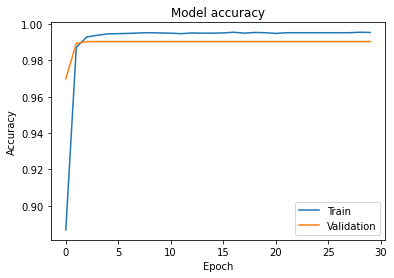

In [61]:
classifier7 = Sequential()
classifier7.add(Dense(NODES1, activation='relu', input_dim=INPUT_DIM))
classifier7.add(Dense(NODES2, activation='relu'))
classifier7.add(Dense(1, activation='sigmoid'))

classifier7.compile(optimizer='adam',  
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

hist = classifier7.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier7)

### Optimizer: adam & Loss: binary_crossentropy & Dropout layer

Epoch 1/30
244/244 [==============================] - 2s 5ms/step - loss: 0.5798 - accuracy: 0.6778 - val_loss: 0.1381 - val_accuracy: 0.9651
Epoch 2/30
244/244 [==============================] - 1s 4ms/step - loss: 0.1669 - accuracy: 0.9477 - val_loss: 0.0668 - val_accuracy: 0.9749
Epoch 3/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0992 - accuracy: 0.9698 - val_loss: 0.0492 - val_accuracy: 0.9877
Epoch 4/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0775 - accuracy: 0.9802 - val_loss: 0.0456 - val_accuracy: 0.9887
Epoch 5/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0712 - accuracy: 0.9851 - val_loss: 0.0466 - val_accuracy: 0.9892
Epoch 6/30
244/244 [==============================] - 1s 5ms/step - loss: 0.0665 - accuracy: 0.9872 - val_loss: 0.0451 - val_accuracy: 0.9892
Epoch 7/30
244/244 [==============================] - 1s 4ms/step - loss: 0.0583 - accuracy: 0.9889 - val_loss: 0.0464 - val_accuracy: 0.9892
Epoch 

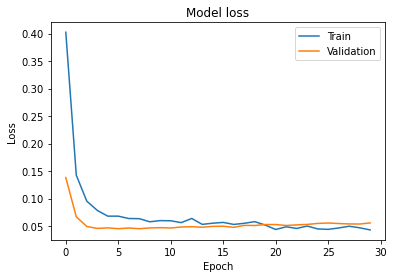

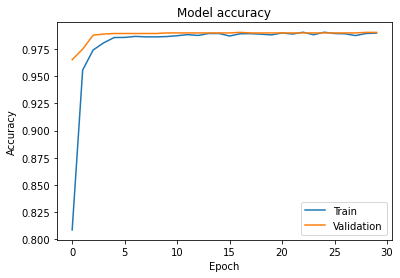

In [62]:
classifier7 = Sequential()
classifier7.add(Dense(NODES1, activation='relu', input_dim=INPUT_DIM))
classifier7.add(Dense(NODES2, activation='relu'))
classifier7.add(layers.Dropout(0.6))
classifier7.add(Dense(1, activation='sigmoid'))

classifier7.compile(optimizer='adam',  
                    loss='binary_crossentropy', 
                    metrics=['accuracy'])

hist = classifier7.fit(X_train, Y_train, 
                       batch_size=BATCH_SIZE, epochs=EPOCHS,
                       validation_data=(X_test, Y_test))

print_result(classifier7)